#### 1. Imports & Load Data

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

# Load enriched data
df = pd.read_csv('enriched_btc_eth_metrics_2024_current.csv', 
                 parse_dates=['date'], 
                 index_col='date')

# Ensure index is datetime
df.index = pd.to_datetime(df.index)

print("Data loaded. Shape:", df.shape)
print("Date range:", df.index.min().date(), "to", df.index.max().date())
df.tail(5)

Data loaded. Shape: (778, 17)
Date range: 2024-01-01 to 2026-02-16


,btc_price_usd,btc_volume,eth_price_usd,eth_volume,btc_daily_ret,eth_daily_ret,btc_price_7d_ma,btc_price_30d_ma,eth_price_7d_ma,eth_price_30d_ma,btc_vol_30d,eth_vol_30d,btc_volume_7d_ma,eth_volume_7d_ma,btc_eth_price_corr_90d,btc_above_30d_ma,eth_above_30d_ma
date,,,,,,,,,,,,,,,,,
2026-02-12,66272.17,24271.74283,1947.85,427567.1469,-1.207990,0.343605,68933.428571,82237.766,2036.702857,2646.270333,77.255911,95.026795,37247.387906,840669.781400,0.984261,False,False
2026-02-13,68853.96,20244.54955,2048.72,425649.7698,3.895738,5.178530,68686.814286,81301.172,2034.608571,2602.730333,78.672841,97.613861,26919.578511,601146.668900,0.985914,False,False
2026-02-14,69822.95,18114.78393,2086.59,220677.2355,1.407312,1.848471,68763.038571,80441.777,2034.538571,2561.660333,79.124938,98.305209,23185.193307,469441.067014,0.987493,False,False
2026-02-15,68832.58,22290.05208,1966.58,834778.0952,-1.418402,-5.751489,68549.067143,79551.165,2016.944286,2517.337000,79.072249,99.419604,23309.410507,519718.330400,0.988717,False,False
2026-02-16,68531.68,3010.97089,1971.25,84828.6982,-0.437148,0.237468,68319.592857,78663.962,1997.834286,2472.693333,79.070860,99.372206,19574.873717,442496.922014,0.989441,False,False


#### 2. Key Interactive Visualizations (Plotly)

- Chart 1: Dual-Axis Price + 30d MA (Interactive with Correction Highlight)

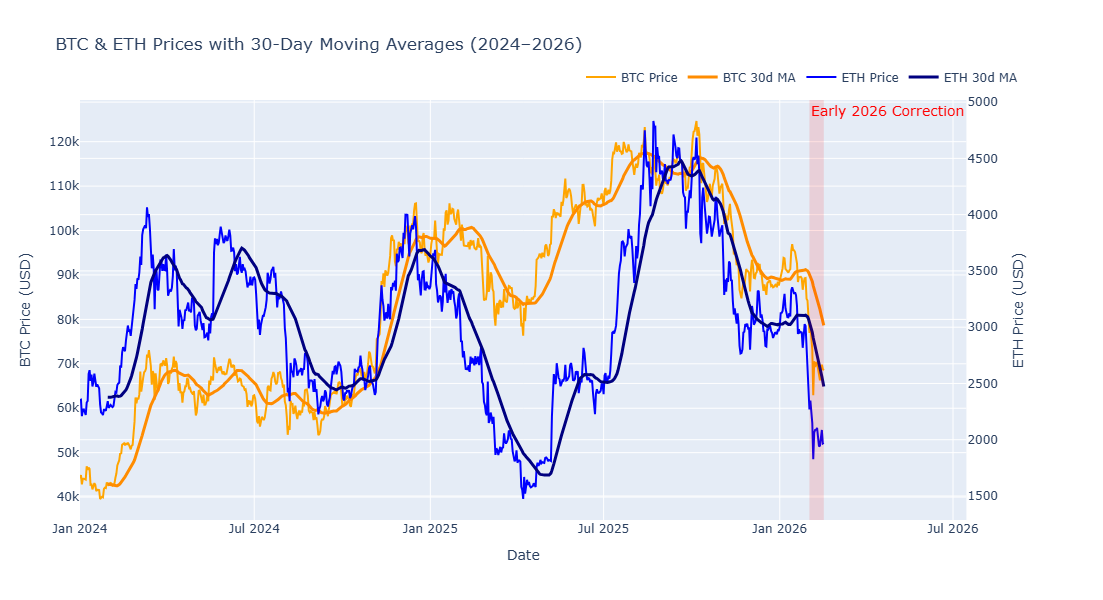

Resorting to unclean kill browser.


In [2]:
fig1 = make_subplots(specs=[[{"secondary_y": True}]])

# BTC
fig1.add_trace(go.Scatter(x=df.index, y=df['btc_price_usd'], 
                          name='BTC Price', line=dict(color='orange')), secondary_y=False)
fig1.add_trace(go.Scatter(x=df.index, y=df['btc_price_30d_ma'], 
                          name='BTC 30d MA', line=dict(color='darkorange', width=3)), secondary_y=False)

# ETH (on secondary axis for scale difference)
fig1.add_trace(go.Scatter(x=df.index, y=df['eth_price_usd'], 
                          name='ETH Price', line=dict(color='blue')), secondary_y=True)
fig1.add_trace(go.Scatter(x=df.index, y=df['eth_price_30d_ma'], 
                          name='ETH 30d MA', line=dict(color='navy', width=3)), secondary_y=True)

# Highlight Feb 2026 correction
fig1.add_vrect(x0='2026-02-01', x1='2026-02-16', 
               fillcolor="red", opacity=0.12, line_width=0,
               annotation_text="Early 2026 Correction", 
               annotation_position="top left", annotation_font_size=14, annotation_font_color="red")

fig1.update_layout(
    title='BTC & ETH Prices with 30-Day Moving Averages (2024–2026)',
    xaxis_title='Date',
    yaxis_title='BTC Price (USD)',
    yaxis2_title='ETH Price (USD)',
    hovermode='x unified',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    height=600, width=1000
)

fig1.show()

# Export for portfolio
fig1.write_html("btc_eth_price_ma_interactive.html")
fig1.write_image("btc_eth_price_ma.png", scale=2)

- Chart 2: Volatility Comparison (30-day Annualized)

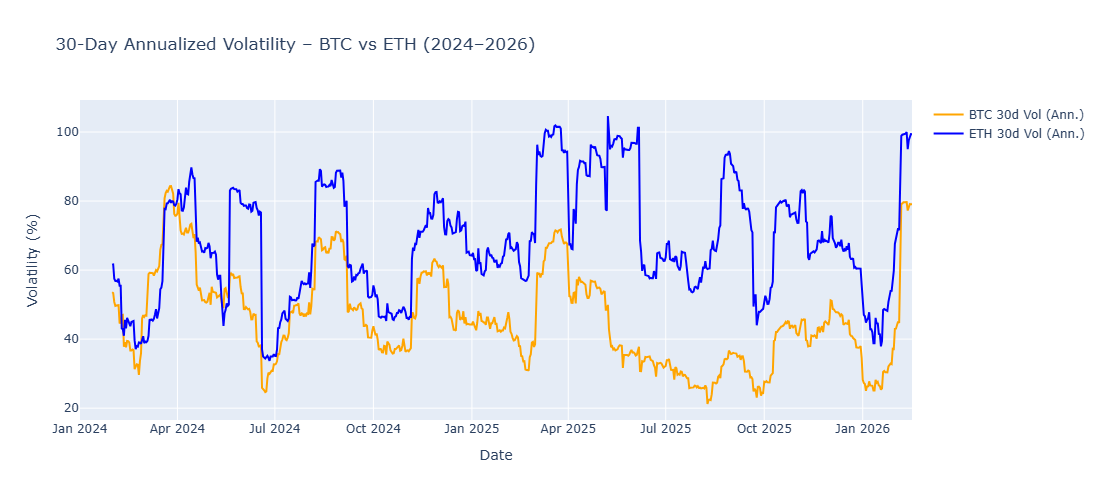

Resorting to unclean kill browser.


In [3]:
fig2 = go.Figure()

fig2.add_trace(go.Scatter(x=df.index, y=df['btc_vol_30d'], 
                          name='BTC 30d Vol (Ann.)', line=dict(color='orange')))
fig2.add_trace(go.Scatter(x=df.index, y=df['eth_vol_30d'], 
                          name='ETH 30d Vol (Ann.)', line=dict(color='blue')))

fig2.update_layout(
    title='30-Day Annualized Volatility – BTC vs ETH (2024–2026)',
    xaxis_title='Date',
    yaxis_title='Volatility (%)',
    hovermode='x unified',
    height=500, width=1000
)

fig2.show()
fig2.write_html("volatility_interactive.html")
fig2.write_image("volatility.png", scale=2)

- Chart 3: BTC-ETH Correlation (90-day Rolling)

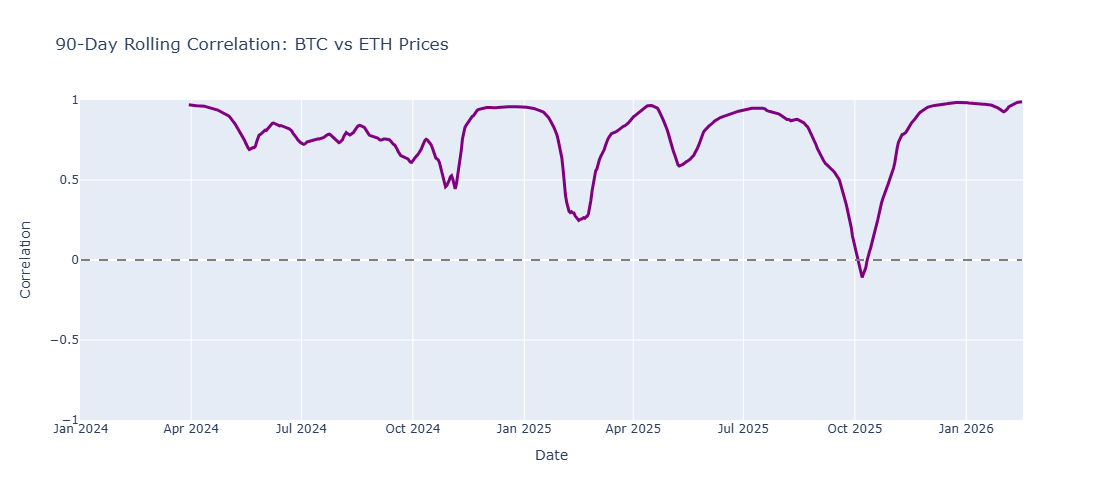

In [4]:
fig3 = px.line(df, x=df.index, y='btc_eth_price_corr_90d',
               title='90-Day Rolling Correlation: BTC vs ETH Prices',
               labels={'btc_eth_price_corr_90d': 'Correlation', 'date': 'Date'})

fig3.update_traces(line=dict(color='purple', width=3))
fig3.update_layout(yaxis_range=[-1,1], height=500, width=1000,
                   shapes=[dict(type='line', x0=df.index.min(), x1=df.index.max(), y0=0, y1=0,
                               line=dict(color='gray', dash='dash'))])

fig3.show()
fig3.write_html("correlation_interactive.html")

- Chart 4: Volume Trends (7-day MA, Log Scale)

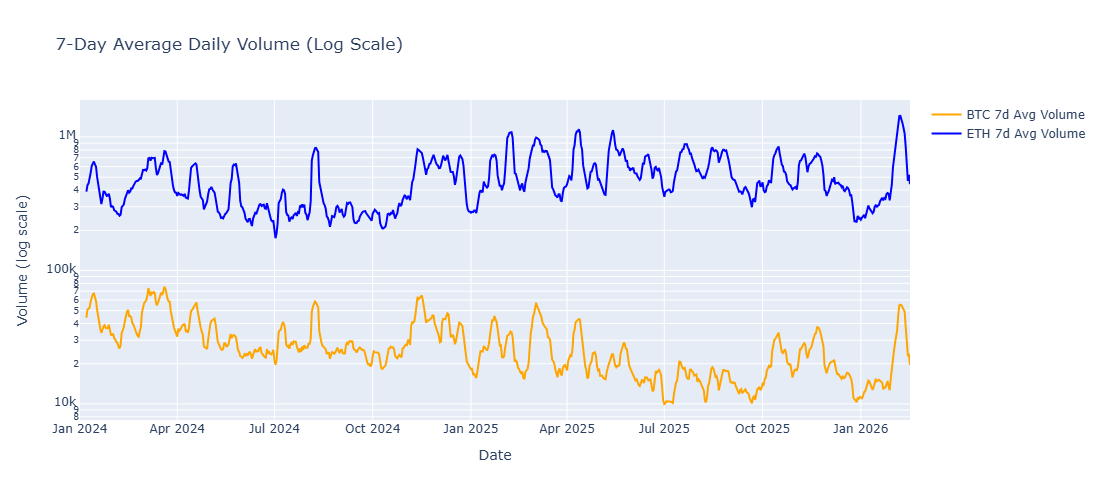

In [5]:
fig4 = go.Figure()

fig4.add_trace(go.Scatter(x=df.index, y=df['btc_volume_7d_ma'], 
                          name='BTC 7d Avg Volume', line=dict(color='orange')))
fig4.add_trace(go.Scatter(x=df.index, y=df['eth_volume_7d_ma'], 
                          name='ETH 7d Avg Volume', line=dict(color='blue')))

fig4.update_layout(
    title='7-Day Average Daily Volume (Log Scale)',
    xaxis_title='Date',
    yaxis_title='Volume (log scale)',
    yaxis_type='log',
    hovermode='x unified',
    height=500, width=1000
)

fig4.show()
fig4.write_html("volume_interactive.html")